<h1>20156042 Kim GaYoung</h1>

$\quad f(x)= x^3 + 2$

In [6]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import sympy as sp
import random

# Define function
def f(x):             
    return x**3+2

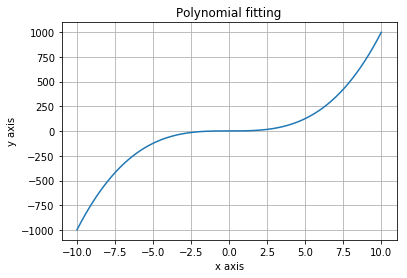

In [7]:
# Define a domain of te function.
t=np.arange(-10,10,0.01) 

# Plot the function

plt.title('Polynomial fitting')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()

plt.plot(t,f(t))
plt.show()

 Plot the generated noisy points along with its original polynomial without noise

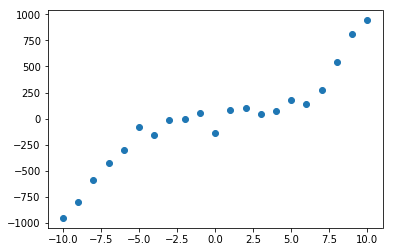

In [8]:
# Create random points
noise = np.zeros((21,2),dtype = 'float')
noise_value = 150

for i in range(21):
    r = random.randrange(-noise_value,noise_value)
    noise[i][0] = i-10
    noise[i][1] = f(i-10) + r
    
plt.scatter(noise[:,0],noise[:,1])
    

 Plot the approximating polynomial curve obtained by solving a least square problem

In [9]:
def f_hat(x,degree,theta):
    sum = 0.0
    for i in range(degree + 1):
        sum += float(theta[i] * (x**i))
    return sum

def least_square(degree):
    A = np.zeros((len(noise),degree+1),dtype = 'float')    #A
    B = np.zeros((len(noise),1),dtype = 'float')           #b

    for i in range(len(noise)):
        for j in range(degree+1):
            A[i,j] = noise[i,0]**j
        B[i] = noise[i,1]

    theta = np.zeros((degree+1,1), dtype = 'float')
    theta = lin.inv(np.matrix(A.T) * np.matrix(A)) * np.matrix(A.T) * np.matrix(B) 

    print(theta)
    
    x = [a for a in range(-10,10)]
    y = [f_hat(b,degree,theta) for b in range(-10,10)]

    plt.title('Polynomial fitting')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.grid()

    plt.plot(t,f(t))
    plt.scatter(noise[:,0],noise[:,1])
    plt.plot(x,y)
    plt.show()

blue : original polynoial , orange : approximating polynomial  

[[ 2.37590101e+01]
 [ 8.38613772e+00]
 [-2.41918342e+00]
 [ 9.08551572e-01]
 [ 2.28325114e-02]]


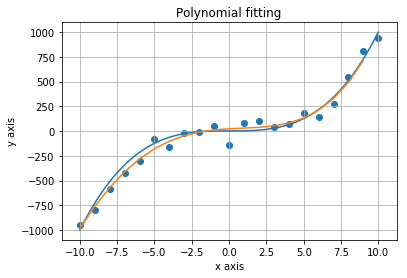

In [10]:
least_square(4)

Plot the approximating polynomial curve with varying polynomial degree

degree = 3

[[ 0.50898987]
 [ 8.38613772]
 [-0.28271271]
 [ 0.90855157]]


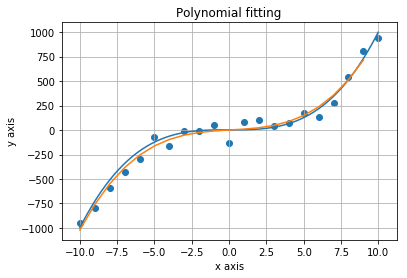

In [11]:
least_square(3)

degree = 2

[[ 0.50898987]
 [68.16883117]
 [-0.28271271]]


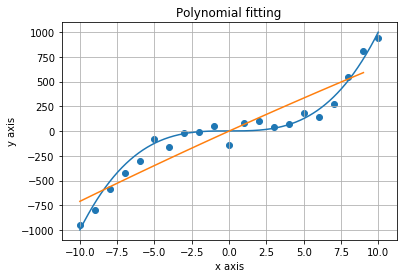

In [13]:
least_square(2)

degree = 5

[[ 2.37590101e+01]
 [ 1.48393296e+00]
 [-2.41918342e+00]
 [ 1.20638493e+00]
 [ 2.28325114e-02]
 [-2.47050713e-03]]


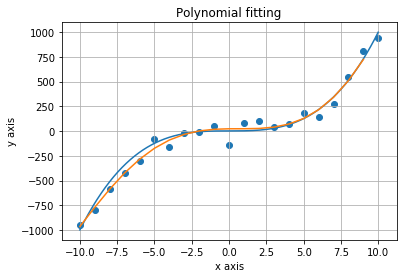

In [14]:
least_square(5)

degree = 1

[[-9.85714286]
 [68.16883117]]


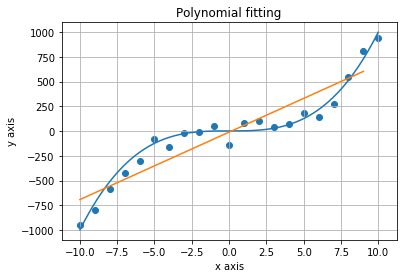

In [15]:
least_square(1)